# Simulate HIV Infection

The human immunodeficiency virus (HIV) infection spreads and can develop into acquired immunodeficiency syndrome (AIDS). AIDS can lead to immune system failure and eventual inability to defend the body against infection or cancer. Without treatment with antiretroviral drugs, survival time after infection with HIV is about 9 to 11 years, depending on a number of factors. Antiretroviral drugs such as TDF (tenofovir), either 3TC (lamivudine) or FTC (emtricitabine), and EFV (efavirenz) are recommended by the World Health Organization as soon as HIV infection is diagnosed. This simulation predicts the spread of HIV infection in a body with an initial infection. The spread of HIV in a patient is approximated with balance equations on (H)ealthy, (I)nfected, and (V)irus population counts.

Initial Conditions

* H(0) = healthy cells = 1,000,000
* I(0) = infected cells = 0
* V(0) = virus = 100

Equations

The equations are transient balances on the number of healthy cells $(H)$, infected cells $(I)$, and virus count $(V)$. Terms on the right side with a positive sign (blue) increase that corresponding number of cells or virus. Likewise, terms with a negative sign (red) decrease the number of cells or virus.

$$\frac{dH(t)}{dt} = \color{blue}{kr_1} \color{red}{- kr_2 H(t) - kr_3 H(t) \; V(t)}$$

$$\frac{dI(t)}{dt} = \color{blue}{kr_3 H(t) \; V(t)} \color{red}{- kr_4 I(t)}$$

$$\frac{dV(t)}{dt} = \color{red}{-kr_3 H(t) \; V(t) - kr_5 V(t)} \color{blue}{+ kr_6 I(t)}$$

There are six parameters $(kr_{1..6})$ in the model that provide the rates of cell death, infection spread, virus replication, and other processes that determine the spread of HIV in the body.

Parameters

* $kr_{1} = 1e5$ = new healthy cells per year
* $kr_{2} = 0.1$ = death rate of healthy cells
* $kr_{3} = 2e-7$ = healthy cells converting to infected cells
* $kr_{4} = 0.5$ = death rate of infected cells
* $kr_{5} = 5$ = death rate of virus
* $kr_{6} = 100$ = production of virus by infected cells

Simulate the healthy, infected, and virus count over the course of 15 years if no treatment such as an anti-retroviral is taken. 

<img src="pictures/hiv_simulation.png" width="200">

The sketch also includes patient data. The final report should include:

* A semi-log-y plot that shows the progress of infection such as the sketch above.
* Discuss what terms you would adjust to match HIV lab data that measures the virus in a patient.
* Suppose that a new antiretroviral drug is evaluated in clinical trials. Virus count data is collected over many years to control the HIV infection. Discuss what terms * could be added to the differential equations to include the effect of an antiretroviral drug.

In [67]:
# Import modules
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [68]:
# Model
def model(y,t):

    # Params
    kr1 = 10**-5
    kr2 = 0.1
    kr3 = 2*10**-7
    kr4 = 0.5
    kr5 = 4.9
    kr6 = 100

    # State
    H = y[0]
    I = y[1]
    V = y[2]

    # Derivative
    dhdt = kr1 - kr2 * H - kr3 * H * V
    didt = kr3 * H * V - kr4 * I 
    dvdt = -kr3 * H * V - kr5 * V + kr6 * I
    return [dhdt, didt, dvdt]


In [69]:
# Read data
data = pd.read_excel('../data/hiv_data.xlsx')

# Un-log data
data['lv'] = 10**data['lv']

In [70]:
# Initial condition
y0 = [1000000.0, 0.0, 100.0]

# Time points
t = np.linspace(0,20, 100)

# Solve ODE
y = odeint(model,y0,t)

C:\Python36\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Python36\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Python36\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


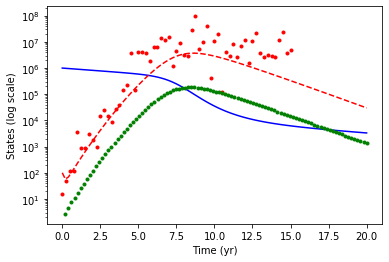

In [71]:
# Plot results
plt.plot(data['time'], data['lv'], 'r.')
plt.plot(t, y[:,0], 'b-')
plt.plot(t, y[:,1], 'g.')
plt.plot(t, y[:,2], 'r--')
plt.yscale('log')
plt.xlabel('Time (yr)')
plt.ylabel('States (log scale)')
plt.show()